# Preprocessing

In [1]:
# Import libraries
import os # Module to control environment, directory, files, etc
import cv2 # OpenCV Library → Helps with computer vision related programming
import matplotlib.pyplot as plt # Library to draw various plots
import numpy as np # Library to help with multi-dimensional tensors
import dlib # High-end c++ library for image processing, machine learning, face recognition

### Loading image

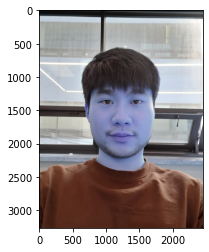

In [2]:
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/test.png' # Set path
img_bgr = cv2.imread(my_image_path)    # Load image via openCV
img_show = img_bgr.copy()      # save a copy for printing an image
plt.imshow(img_bgr) # Load the image for plot(Doesn't actually print the image)
plt.show() # Show the image (Prints the image)

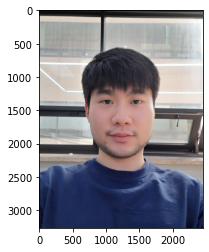

In [3]:
# with openCV need to change color pattern back to RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # changing color pattern
plt.imshow(img_rgb)
plt.show()

# Face detection

### Bounding box

In [4]:
# Declare detector
detector_hog = dlib.get_frontal_face_detector() # use dlib library to load face detector

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 2)   # (image, num of image pyramid)

rectangles[[(750, 1082) (1744, 2076)]]


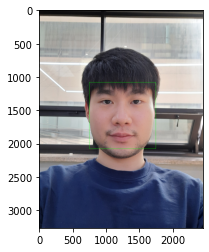

In [6]:
# List of found bounding box
# There can be many faces
print(dlib_rects)   

for dlib_rect in dlib_rects: # Coordinates of the found face
    l = dlib_rect.left() # left
    t = dlib_rect.top() # top
    r = dlib_rect.right() # right
    b = dlib_rect.bottom() # bottom

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # draw a rectangle based on coordiantes
                                                                              # of starting and ending points

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Face landmark

In [7]:
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # assign landmark model address to a variable
landmark_predictor = dlib.shape_predictor(model_path)
    # load model using shape_predictor from dlib library
    # landmark_predictor receives RGB image and dlib.rectangle and returns dlib.full_object_detection
    # dlib.rectangle: predicting the inside of the box
    # dlib.full_object_detection: points out each object's location on the image and element's location

In [8]:
list_landmarks = []
    # list for landmark locations

# locate face landmark from face bounding box
# save face landmark coordinates
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # assign landmark's location info to a variable(points)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # save as a list in (x,y) format from each landmark location
    list_landmarks.append(list_points)
        # add to list_landmarks

print(len(list_landmarks[0]))
    # n amount of face has n amount of list_landmarks elements
    # each element contains a list of 68 landmarks location
    # list_landmarks has 1 element, so list_landmarks[1] will raise an IndexError

68


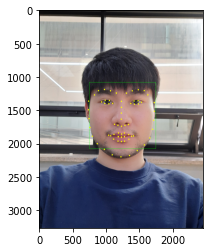

In [9]:
# list_landmarks has 1 element, thus below for loop runs only once
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
            # cv2.circle: draws circle using OpenCV
            # each point on the image of img_show
            # draws a circle of size is 10 and (0, 255, 255) RGB color filled(-1)
            # originally drew circles with size 2, but couldn't see the circles, so changed the size to 10
            # if last parameter is a natural number, draw a circle with that thickeness

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # convert to RGB
plt.imshow(img_show_rgb)
plt.show()

# King sticker

In [10]:
# zip() : compiles two group of data
# compiled dlib_rects and list_landmarks
# dlib_rects : value of face area
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : contains 68 landmark values (values in (x,y) format)
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # zip face area values and 68 landmarks using for loop
    print (landmark[29]) # index of nose is 29
    x = landmark[29][0] # x value of nose on the image
    y = landmark[29][1] - dlib_rect.height()//2 # y value of the nose in the image - amount of pixel//2 from vertical facial area → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # width of the face area pixel count (531-345+1) → max(x) - min(x) + 1 (added 1 due to being nums of pixel → pixel is 1)
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(1228, 1543)
(x,y) : (1228,1046)
(w,h) : (995,995)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png' # path of the cat-whiskers
img_sticker = cv2.imread(sticker_path) # load sticker image // cv2.imread(image path) → returns image object matrix
img_sticker = cv2.resize(img_sticker, (w,h)) # resizing sticker image → w,h is the pixel num of the face width (187) // cv2.resize(image object matrix, (width, height))
print (img_sticker.shape) # shape of the resized cat-whiskers

(995, 995, 3)


In [12]:
# x,y,w,h: retrieved values from above for loop
# x, y are values of nose in the image = 1232, 1243
# w, h are num of pixels of face area width = 995
refined_x = x - w // 2 # 1232 - (995//2) = 1232 - 497 = 735
refined_y = y - h # 1243 - 995 = 248
# control coordinates of x, y in order to add the sticker image on the original image
# starting point of the image is top-left coordinates
# thus, refined_x, refined_y starts the cat-whiskers image
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) # if neg vals : means it went over the frame of the original image
# if specific location of the image - sticker height or width is neg,
# opencv uses ndarray data, ndarray cannot access negative index, so need to crop the sticker image

(x,y) : (731,51)


In [13]:
# need to shift sticker image, so it doesn't go over the image frame
# coordinate order is y, x. (y,x,rgb channel)
# if neg val, crop sticker upto (-y), fix top's x, y coordinates based on image boundary
# crop sticker image for the amount of neg vals
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# fixing y coordinate for sticker image to start
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # if refined_y is neg val, it becomes pos val
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (731,51)


In [14]:
# sticker_area is cropped location from the original image to apply sticker
# care that it's the y, x coordinates. (y,x,rgb channel)
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# applying the image area with sticker image where the value is 255 otherwise, sticker image doesn't override the original image
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

print(img_sticker.shape)

(995, 995, 3)


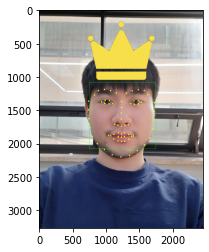

In [15]:
# image with a sticker
# showing image + face boundary box + landmarks + cat whiskers sticker
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

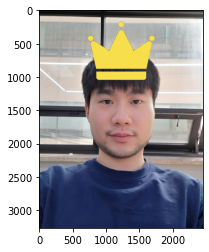

In [16]:
# original image with only sticker applied
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr is a variable with the original image
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# Hero sticker

In [10]:
# zip() : compiles two group of data
# compiled dlib_rects and list_landmarks
# dlib_rects : value of face area
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : contains 68 landmark values (values in (x,y) format)
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # zip face area values and 68 landmarks using for loop
    print (landmark[33]) # index of nose is 33
    x = landmark[33][0] # x value of nose on the image
    y = landmark[33][1] - dlib_rect.height()//2 # y value of the nose in the image - amount of pixel//2 from vertical facial area → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # width of the face area pixel count (531-345+1) → max(x) - min(x) + 1 (added 1 due to being nums of pixel → pixel is 1)
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(1232, 1740)
(x,y) : (1232,1243)
(w,h) : (995,995)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/hero.png' # path of the cat-whiskers
img_sticker = cv2.imread(sticker_path) # load sticker image // cv2.imread(image path) → returns image object matrix
img_sticker = cv2.resize(img_sticker, (w,h)) # resizing sticker image → w,h is the pixel num of the face width (187) // cv2.resize(image object matrix, (width, height))
print (img_sticker.shape) # shape of the resized cat-whiskers

(995, 995, 3)


In [12]:
# x,y,w,h: retrieved values from above for loop
# x, y are values of nose in the image = 1232, 1243
# w, h are num of pixels of face area width = 995
refined_x = x - w // 2 # 1232 - (995//2) = 1232 - 497 = 735
refined_y = y - h # 1243 - 60 = 1183
# control coordinates of x, y in order to add the sticker image on the original image
# starting point of the image is top-left coordinates
# thus, refined_x, refined_y starts the cat-whiskers image
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) # if neg vals : means it went over the frame of the original image
# if specific location of the image - sticker height or width is neg,
# opencv uses ndarray data, ndarray cannot access negative index, so need to crop the sticker image

(x,y) : (735,248)


In [13]:
# need to shift sticker image, so it doesn't go over the image frame
# coordinate order is y, x. (y,x,rgb channel)
# if neg val, crop sticker upto (-y), fix top's x, y coordinates based on image boundary
# crop sticker image for the amount of neg vals
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# fixing y coordinate for sticker image to start
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # if refined_y is neg val, it becomes pos val
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (735,248)


In [14]:
# sticker_area is cropped location from the original image to apply sticker
# care that it's the y, x coordinates. (y,x,rgb channel)
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# applying the image area with sticker image where the value is 255 otherwise, sticker image doesn't override the original image
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

print(img_sticker.shape)

(995, 995, 3)


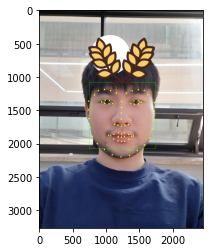

In [15]:
# image with a sticker
# showing image + face boundary box + landmarks + cat whiskers sticker
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

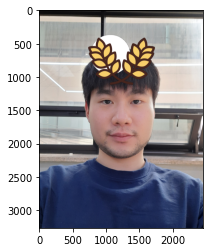

In [16]:
# original image with only sticker applied
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr is a variable with the original image
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# Cat whiskers sticker

In [10]:
# zip() : compiles two group of data
# compiled dlib_rects and list_landmarks
# dlib_rects : value of face area
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : contains 68 landmark values (values in (x,y) format)
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # zip face area values and 68 landmarks using for loop
    print (landmark[33]) # index of nose is 33
    x = landmark[33][0] # x value of nose on the image
    y = landmark[33][1] - dlib_rect.height()//2 # y value of the nose in the image - amount of pixel//2 from vertical facial area → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # width of the face area pixel count (531-345+1) → max(x) - min(x) + 1 (added 1 due to being nums of pixel → pixel is 1)
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(1232, 1740)
(x,y) : (1232,1243)
(w,h) : (995,995)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # path of the cat-whiskers
img_sticker = cv2.imread(sticker_path) # load sticker image // cv2.imread(image path) → returns image object matrix
img_sticker = cv2.resize(img_sticker, (w,h)) # resizing sticker image → w,h is the pixel num of the face width (187) // cv2.resize(image object matrix, (width, height))
print (img_sticker.shape) # shape of the resized cat-whiskers

(995, 995, 3)


In [12]:
# x,y,w,h: retrieved values from above for loop
# x, y are values of nose in the image = 1232, 1243
# w, h are num of pixels of face area width = 995
refined_x = x - w // 2 # 1232 - (995//2) = 1232 - 497 = 735
refined_y = y - 60 # 1243 - 60 = 1183
# control coordinates of x, y in order to add the sticker image on the original image
# starting point of the image is top-left coordinates
# thus, refined_x, refined_y starts the cat-whiskers image
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) # if neg vals : means it went over the frame of the original image
# if specific location of the image - sticker height or width is neg,
# opencv uses ndarray data, ndarray cannot access negative index, so need to crop the sticker image

(x,y) : (735,1183)


In [13]:
# need to shift sticker image, so it doesn't go over the image frame
# coordinate order is y, x. (y,x,rgb channel)
# if neg val, crop sticker upto (-y), fix top's x, y coordinates based on image boundary
# crop sticker image for the amount of neg vals
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# fixing y coordinate for sticker image to start
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # if refined_y is neg val, it becomes pos val
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (735,1183)


In [14]:
# sticker_area is cropped location from the original image to apply sticker
# care that it's the y, x coordinates. (y,x,rgb channel)
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# applying the image area with sticker image where the value is 255 otherwise, sticker image doesn't override the original image
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

print(img_sticker.shape)

(995, 995, 3)


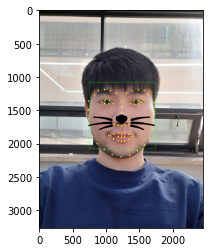

In [15]:
# image with a sticker
# showing image + face boundary box + landmarks + cat whiskers sticker
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

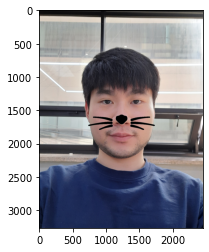

In [16]:
# original image with only sticker applied
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr is a variable with the original image
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# Grayscale image with cat whiskers

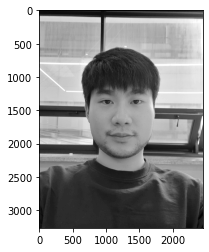

In [6]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

### Face bounding box

rectangles[[(750, 1082) (1744, 2076)]]


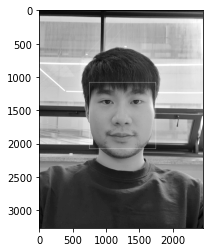

In [7]:
# Declare detector
detector_hog = dlib.get_frontal_face_detector() 
dlib_rects = detector_hog(img_gray, 2)   

print(dlib_rects)   

for dlib_rect in dlib_rects: # Coordinates of the found face
    l = dlib_rect.left() # left
    t = dlib_rect.top() # top
    r = dlib_rect.right() # right
    b = dlib_rect.bottom() # bottom

    cv2.rectangle(img_show, (l,t), (r,b), (255,255,255), 2, lineType=cv2.LINE_AA) 
img_show_gray =  cv2.cvtColor(img_show, cv2.COLOR_BGR2GRAY)
plt.imshow(img_show_gray, cmap='gray')
plt.show()

### Face landmarks

In [8]:
model_path = os.getenv('HOME') + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [9]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_gray, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


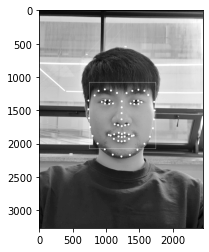

In [10]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 15, (255, 255, 255), -1)

img_show_gray = cv2.cvtColor(img_show, cv2.COLOR_BGR2GRAY)
plt.imshow(img_show_gray, cmap='gray')
plt.show()

### Cat whiskers

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # index of nose is 33
    x = landmark[33][0] # x value of nose on the image
    y = landmark[33][1] - dlib_rect.height()//2 # y value of the nose in the image - amount of pixel//2 from vertical facial area → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # width of the face area pixel count (531-345+1) → max(x) - min(x) + 1 (added 1 due to being nums of pixel → pixel is 1)
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(1235, 1738)
(x,y) : (1235,1241)
(w,h) : (995,995)


In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # path of the cat-whiskers
img_sticker = cv2.imread(sticker_path) # load sticker image // cv2.imread(image path) → returns image object matrix
img_sticker = cv2.resize(img_sticker, (w,h)) # resizing sticker image → w,h is the pixel num of the face width (187) // cv2.resize(image object matrix, (width, height))
print (img_sticker.shape) # shape of the resized cat-whiskers

(995, 995, 3)


In [13]:
# x,y,w,h: retrieved values from above for loop
# x, y are values of nose in the image = 1232, 1243
# w, h are num of pixels of face area width = 995
refined_x = x - w // 2 # 1232 - (995//2) = 1232 - 497 = 735
refined_y = y - 60 # 1243 - 60 = 1183
# control coordinates of x, y in order to add the sticker image on the original image
# starting point of the image is top-left coordinates
# thus, refined_x, refined_y starts the cat-whiskers image
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) # if neg vals : means it went over the frame of the original image
# if specific location of the image - sticker height or width is neg,
# opencv uses ndarray data, ndarray cannot access negative index, so need to crop the sticker image

(x,y) : (738,1181)


In [14]:
# need to shift sticker image, so it doesn't go over the image frame
# coordinate order is y, x. (y,x,rgb channel)
# if neg val, crop sticker upto (-y), fix top's x, y coordinates based on image boundary
# crop sticker image for the amount of neg vals
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# fixing y coordinate for sticker image to start
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # if refined_y is neg val, it becomes pos val
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (738,1181)


In [15]:
# sticker_area is cropped location from the original image to apply sticker
# care that it's the y, x coordinates. (y,x,rgb channel)
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# applying the image area with sticker image where the value is 255 otherwise, sticker image doesn't override the original image
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

print(img_sticker.shape)

(995, 995, 3)


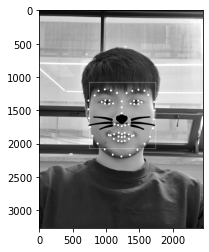

In [16]:
# image with a sticker
# showing image + face boundary box + landmarks + cat whiskers sticker
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.show()

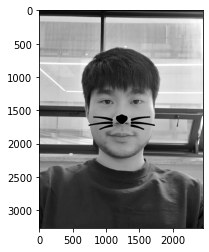

In [17]:
# original image with only sticker applied
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr is a variable with the original image
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.show()

# 회고

1회차
- 이번 프로젝트를 진행하면서 배웠던 코딩 구현 방식으로 내 사진에 왕관과 월계관을 붙여보았다.
- 전체적인 큰 흐름은 이해를 하였지만, 각 코드 자체를 이해하는 것이 어려웠다.
- 당연히 고양이 수염 스티커도 적용시켜 봤지만, 머리에 수염이 붙었었다.

2회차
- 코의 위치는 랜드마크를 만드는 코드를 통해 위치를 쉽게 알아낼 수 있었다.
- 왕관이나 월계관에는 코의 y좌표에서 height//2를 빼서 스티커가 붙을 위치를 머리 위로 계산해 놓았었지만, 수염은 코 옆에 있어야 해서 따로 빼지 않고, 그대로 적용시켜서 위치를 맞췄다.
- 다만 수염 스티커를 붙이는데 스티커 이미지의 하얀 화면이 얼굴을 다 덮어씌우는 문제가 생겼다.
- 생각을 하며 스티커를 붙이는 코드 셀을 보다가 np.where을 사용하여 숫자에 따라 사진에 스티커를 붙이는 것을 알게되었다.
- 숫자를 바꿔줘서 사진에 수염 스티커를 붙일 수 있었다.
- 추가로 고쳐야 했던 문제가, 스티커의 코가 내 코에 약간 싱크가 안 맞았다.

3회차
- 코의 y좌표에 landmark 좌표들과 dlib.rectangle height등 여러가지를 빼가며 스티커와 사진의 코 위치를 정확히 맞춰보려 했으나, 성공하지 못했다.
- 결국엔 직접 픽셀값을 빼가며 스티커의 코와 사진의 코 위치를 정확히 맞추는데 성공했다.

4회차
- 흑백사진으로 진행해보았다.
    - 딱히 무리없이 수염 스티커가 사진에 잘 붙었다.
    - `cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)`를 사용하여 바로 흑백사진으로 바꿀 수 있었다.
    - `plt.imshow(src, cmap='gray')`를 사용하여 흑백사진을 출력할 수 있었다.
- 사진의 명암을 조절하여 face detection, landmark, etc를 진행해보았다.
- 